#### Note: Before you read this, please read the `probability_theory-discrete` notebook.

# 1. When counting isn't enough

Question:

* What if I can't count?

That question didn't come out right. The question really is: what if we are dealing with variables where we can't just simply count the relative frequencies? That's easy enough for things like words, but what about cases where the variables aren't so....**discrete**?

#### Example: Write a probability distribution/function `P(W)` for cat weights. So if your friend Biff says "I have a cat that weights 3.44 pounds" (or is it kilos?) then you can tell Biff what P(W=3.44) is.

So, you download the [catsM data](https://vincentarelbundock.github.io/Rdatasets/datasets.html), load it up, and you count up the relative frequencies:

In [1]:
import pandas as pd # <- the pandas library has a lot of nice things for working with data

data = pd.read_csv('catsM.csv') # loads a pandas data frame

len(data)

97

In [34]:
data[:10] 

,Unnamed: 0,Sex,Bwt,Hwt
0,1,M,2.0,6.5
1,2,M,2.0,6.5
2,3,M,2.1,10.1
3,4,M,2.2,7.2
4,5,M,2.2,7.6
5,6,M,2.2,7.9
6,7,M,2.2,8.5
7,8,M,2.2,9.1
8,9,M,2.2,9.6
9,10,M,2.2,9.6


We're interested in the `Bwt` (body weight) column, so let's do what we did before and just count up the relative frequencies:

In [2]:
min(data.Bwt)

2.0

In [3]:
max(data.Bwt)

3.9

In [4]:
from collections import Counter 

counts = Counter(data['Bwt']) # all the values in the Bwt column from the dataframe

In [5]:
counts

Counter({2.0: 2,
         2.1: 1,
         2.2: 8,
         2.3: 1,
         2.4: 5,
         2.5: 8,
         2.6: 6,
         2.7: 9,
         2.8: 7,
         2.9: 5,
         3.0: 9,
         3.1: 6,
         3.2: 6,
         3.3: 5,
         3.4: 5,
         3.5: 5,
         3.6: 4,
         3.7: 1,
         3.8: 2,
         3.9: 2})

You write your `P` function:

In [6]:
def P(W=''):
    global counts
    global data
    return counts[W] / len(data['Bwt'])

And you test it out by making sure everything sums to one:

In [7]:
import numpy as np

round(np.sum([P(W=x) for x in set(data['Bwt'])]),3)

1.0

(After rounding errror) is basically one. So, you try to see how probable it is for Biff's cat: P(W=3.44)

In [8]:
P(W=3.44)

0.0

*Wait, it's ZERO? How can that be? I mean,  the data points seem to range from 2.1 to 3.9, so what gives here? There should be some cats that weigh 3.44 pounds, right?*

Yes, there are. This is an example of trying to treat continuous data as discrete. 

Question:

* *What is the difference between discrete and continuous?*

Answer: 

* Discrete: individually separate and distinct
* Continuous: forming an unbroken whole; without interruption
* Another way to look at it is discrete data are things you can count (like words), whereas continuous data are things that belong on a number range (like cat weights). 

Question:

* *Can't we just make continuous data discrete by putting various ranges into pre-defined "bins?"*

Answer:

* Yes you can. But who is to say what the bins should be?

I mean, we can try it. Let's bin from 1-2.5, 2.5-3, 3-3.5, 3.5-4.

In [21]:
bins =    [1.0, 2.5,     3.0,     3.5,    4.0]
group_names =  ['small','medium','large','huge'] 

In [22]:
# the pandas library has provisions for binning
categories = pd.cut(data['Bwt'], bins, labels=group_names)
data['categories'] = pd.cut(data['Bwt'], bins, labels=group_names)

In [23]:
data[:10]

,Unnamed: 0,Sex,Bwt,Hwt,categories
0,1,M,2.0,6.5,small
1,2,M,2.0,6.5,small
2,3,M,2.1,10.1,small
3,4,M,2.2,7.2,small
4,5,M,2.2,7.6,small
5,6,M,2.2,7.9,small
6,7,M,2.2,8.5,small
7,8,M,2.2,9.1,small
8,9,M,2.2,9.6,small
9,10,M,2.2,9.6,small


In [24]:
counts = Counter(data['categories'])

In [25]:
counts

Counter({'small': 25, 'medium': 36, 'large': 27, 'huge': 9})

And since Biff's cat is 3.44 pounds, its binned as `large`. So what's P(W='large')?

In [26]:
P(W='large')

0.27835051546391754

That actually doesn't seem unreasonable. 

However, it's not always easy to bin continuous data into discrete bins and counting data isn't always the best way to  write your probability functions/distributions. 

# 2. Writing Continuous Probability Functions/Distributions

For some computer scientists, determining a probability function that is continuous it's not quite straight-forward.

Well, maybe this will help: if probability distributions are functions, then is there another way of writing a function that could be continuous? I.e., can we write functions without first counting things? 

Yes, it turns out that most math functions are written like this. You probably recognize the function:

$$y = mx + b$$

As the generic linear function where $b$ is the value of y at the 0 intercept, and $x$ as the step of increase for every $y$. 

This is fairly straight-forward to define and apply in Python. We can even draw a nice graph:

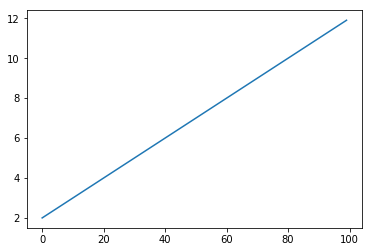

In [31]:
%matplotlib inline  

import matplotlib.pyplot as plt

# our function y = mx + b (default m=0.5 and b=5)
def y(x, m=0.5, b=5):
    return m * x + b

# let's plot it for x values 0 to 100
r = range(0,100)
plt.plot(r, [y(x, m=0.1, b=2) for x in r])

Above is just a simple linear function $y = 0.5 x + 5$. That's a simple **continuous** function. If only we could bend this line around to fit our data. That way, no matter what value we give to it, it will yield some kind of probability. 

Question:

* *Okay, can we write a function like THAT for our cat data?*

Answer:

* Possibly. In order to do that, we have to determine what kind of function it looks like. To do that, we have to analyze the data a bit. 

We have our data stored in a `pandas` dataframe, so we can maybe use that to get some information about the underlying data. Remember, we're interested in `Bwt`:

In [32]:
data.describe()

,Unnamed: 0,Bwt,Hwt
count,97.000000,97.000000,97.000000
mean,49.000000,2.900000,11.322680
std,28.145456,0.467484,2.542288
min,1.000000,2.000000,6.500000
25%,25.000000,2.500000,9.400000
50%,49.000000,2.900000,11.400000
75%,73.000000,3.200000,12.800000
max,97.000000,3.900000,20.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe32c808f28>,
      dtype=object)

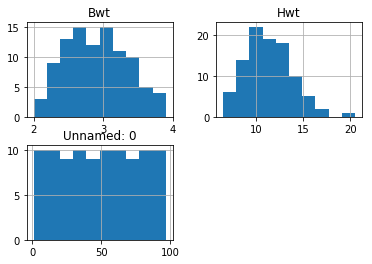

In [50]:
data.hist() # a way of binning and showing the frequencies of how things are binned

These show something interesting. Let's look closer at the one for `Bwt`:

/home/casey/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


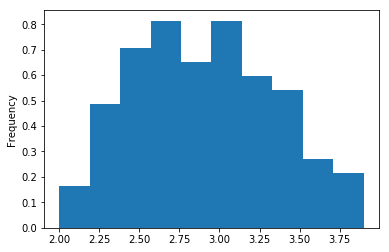

In [33]:
data.Bwt.plot(kind='hist', normed=True)

Can we now draw a line that follows the histogram? If we could do that, then we'd have our function!

/home/casey/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


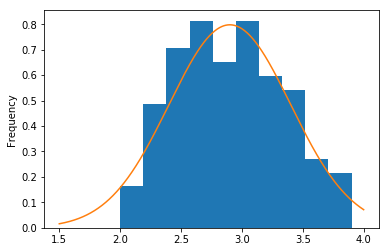

In [38]:
from scipy.stats import norm  

data.Bwt.plot(kind='hist', normed=True)

r = np.arange(1.5, 4, 0.001)
plt.plot(r, norm.pdf(r,2.9,0.5))

That actually doesn't look too bad. Can we use that? 

Yes. In fact, data so often looks like this, that this function is pre-defined in several Python libraries. You might recognize it as the "bell curve" or the "normal curve." To sound smart at cocktail parties, we call this the **Gaussian**.

I want you to notice the final line, which is actually the line that plots the function: 
`plt.plot(r, norm.pdf(range,2.9,0.5))`. 

The values `2.9` and `0.5` are values that tell the Gaussian where it's apex (i.e., center) should be and how wide the two tails on each end should be. I tried a few differnt values in both, but the one that "looks like" it fit the best was 2.9 for the center, and 0.5 for the width, which we see above.

These two values are, respectively, the **mean** and the **standard deviation** (from the mean; denoted as "std")

Those numbers look somewhat familiar. Let's look at the `describe()` function again (still focusing on `Bwt`):

In [39]:
data.describe() 

,Unnamed: 0,Bwt,Hwt
count,97.000000,97.000000,97.000000
mean,49.000000,2.900000,11.322680
std,28.145456,0.467484,2.542288
min,1.000000,2.000000,6.500000
25%,25.000000,2.500000,9.400000
50%,49.000000,2.900000,11.400000
75%,73.000000,3.200000,12.800000
max,97.000000,3.900000,20.500000


*Hold the phone here, the "mean" value is 2.9 just like our center, and the "std" value is 0.467, which is pretty close to our 0.5! Do those numbers have anything to do with the function we need to write for this data?*

Yes, they do. In fact, let's plug those two numbers into our plot:

/home/casey/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


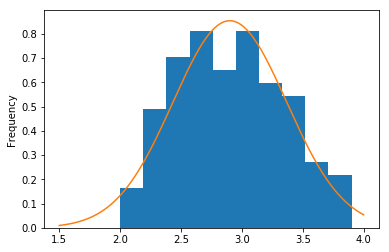

In [40]:
data.Bwt.plot(kind='hist', normed=True)
r = np.arange(1.5, 4, 0.001)
plt.plot(r, norm.pdf(r,2.9,0.467)) # <- plug those numbers in here

That's even better than before! 

Question:

* *So can we use those values to write our function? What was it called? The Gaussian?*

Answer: 

* Yes! Let's write our probability function using the Gaussian function (which one can find on the Internetss):

In [41]:
import math

def P(W='', mean=2.9, std=0.467):
    return 1.0 / (math.sqrt(2.0 * math.pi) * std) * math.exp(-(((W - mean)**2.0) / (2.0 * std ** 2.0)))

That is, we can define the function with the **parameters** **mean** and **std**. Then we can give it any number we want, even if it wasn't in the training data, and it will give us a probability!

Alright, Biff, the probability that your cat weights 3.44 lbs like you said is:

In [47]:
P(W=3.44)

0.43777643662857885

(As a sanity check, let's make sure our Gaussian function for our probability distribution yields the same probability as if we used a built-in function written by a smart person)

In [48]:
def P(W='', mean=2.9, std=0.467):
    return norm.pdf(W,mean,std)

In [49]:
P(W=3.44)

0.43777643662857885

Phew, they are (pretty much) the same. Sanity checked. 

Okay, now how probable would a tiny cat be? Say, 0.1 lbs?

In [50]:
P(W=0.1)

1.3348981448786469e-08

So, very very not-probable.

What about a huge cat that weighs 10 lbs?

In [51]:
P(W=10)

5.486246224510481e-51

Also very improbable, as we might expect. Not impossible, but not probable at all. 

## Parameters.

It turns out that the Gaussian equation is so useful that we can use it as a general formula for a lot of different continuous data, not just our cat weights. Here's the formula again:

### $$n(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{\frac{-(x - \mu)^2}{2\sigma^2}}$$

So $n$ here is basically a special probability function that takes in **parameters** for the mean ($\mu$) and the standard deviation ($\sigma$) to tell the function where to center and how wide to set the tails (respectively) and then you can pass in whatever value you want for x and it will yield a probability. 

This kind of function is called a **parametric** function. Like with the descrete probability functions, we can use data to determine how the function should behave, but we don't count things. Instead, we learn the parameters. For the case of this Gaussian function, we only need to learn the parameters $\mu$ and $\sigma$. 


We can compute $\mu$ and $\sigma$ for any distribution, even our discrete ones we wrote in the previous notebook. Just use these formulas:

### $$\mu = \frac{x}{\sum_{x \in X} x}$$ 

(i.e., the average) and the standard deviation is:

### $$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 } $$

Question:

* This seems odd. Is it really true that we can calculate the mean and std using these equations, even if we are trying to come up with a continuous function? 

Answer:

* Even if you are trying to "model" your distribution using a Gaussian, you will be using a bunch of individual data points. Data points (i.e., events or samples) can still be used to calculate these two important parameters using the above formulas. 

But we can do this easily with the numpy or pandas package:

In [52]:
np.mean(data['Bwt'])

2.8999999999999995

In [53]:
np.std(data['Bwt'])

0.46506844635366784

Of course, one can compute the mean and std of ANY distribution. 

Question:

* If we apply all the possible values to this Gaussian function, would it sum to one?

Answer:

* No (what precision should our values be anyway? 0.1? 0.01? 0.00001? Try summing all that up). Since this is continuous, instead of summing we would take the integral over the function. The integral result should be one. 


#### Note: This only works if the underlying data fit to a Gaussian kind of function. While this is a very common occurance allowing us to use the Gaussian function for a lot of different continuous kinds of data, it doesn't work everywhere. 

There are other kinds of parametric equations, like the **binomial** which works when there is a single variable and it can only take on two values (i.e., it's binary). It has very different parameters (`p` which is the probability of one of the values, and `n` the number of trials). This is actually a discrete distribution, but it's common since a lot of data is binary. In fact, there are whole families of parametric equations like this that we can use for our probability functions.



Question:
    
* Are there other continuous distributions that we should know about?

Answer:

* Yes, there are many of them: https://en.wikipedia.org/wiki/Category:Continuous_distributions


Let's say you gather some data, you make a histogram, then you try to fit a function onto it:

In [133]:
y = [100,40,18,12.5,6.75,3.8,1.6,0.8,0.4,0.2,0.1]
y = [x / max(y) for x in y]
x = range(len(y))

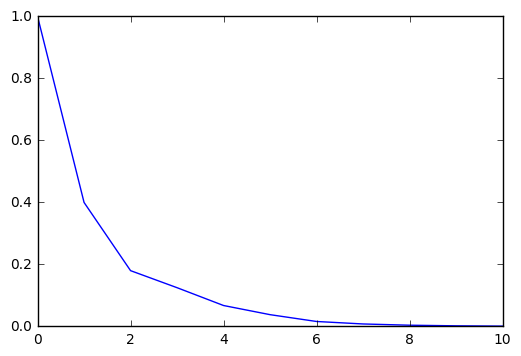

In [134]:
plt.plot(x,y)

* What kind of distribution is that? That most definitely is not Gaussian!

It might be exponential. Let's try that:

In [131]:
def P(X='', l=0.5):
     return l * (math.e ** (- l * X)) 

Unlike the Gaussian which needs the mean and std to determine how the function is placed and stretched, the exponential function needs lambda (`l`), which has something to do with the rate of exponential decay. If you want an accurate 

In [132]:
P(X=2)

0.18393972058572117

### What about other distributions, like Bernoulli, Multinoulli, or Laplace?

In [31]:
from IPython.display import YouTubeVideo

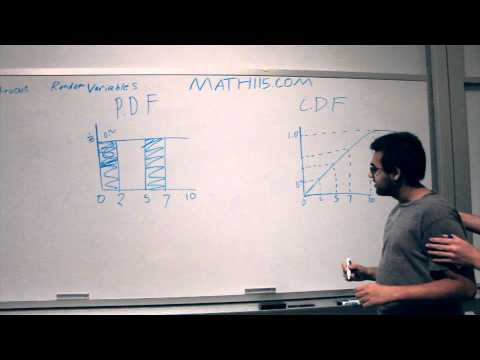

In [32]:
### PDF vs CDF
YouTubeVideo('ce3kUWkY9IY')

### How do we learn parameters for data, given a particular distribution? 

For the moment, use maximum likelihood estimation (MLE). 

Note: I recently downloaded the cat data again and there were more entries (144 instead of 97). The distribution was very different.